In [2]:
# Data preprocessing
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from glob import glob
#import Image
import os
import random
from PIL import Image
#import cv2

In [3]:
import keras
from keras.models import Sequential, Model,load_model
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras import regularizers
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator,array_to_img
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from keras.metrics import PrecisionAtRecall,Recall, Precision
#Model Analysis
from sklearn.metrics import confusion_matrix

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.optimizers import SGD
from keras import backend as K
from sklearn import metrics
#from keras import metrics
#from keras import keras_metrics

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Image.open('/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID/COVID-1.png')
im = Image.open('/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID/COVID-1.png')
print(im.size)

(299, 299)


In [10]:
path = '/content/drive/MyDrive/COVID-19_Radiography_Dataset'

diag_code_dict = {
    'COVID': 0,
    'Lung_Opacity': 1,
    'Normal': 2,
    'Viral Pneumonia': 3}

diag_title_dict = {
    'COVID': 'Covid-19',
    'Lung_Opacity': 'Lung Opacity',
    'Normal': 'Healthy',
    'Viral Pneumonia': 'Viral Pneumonia'}

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(path, '*','*.png'))}

covidData = pd.DataFrame.from_dict(imageid_path_dict, orient = 'index').reset_index()
covidData.columns = ['image_id','path']
classes = covidData.image_id.str.split('-').str[0]
covidData['classes'] = classes

In [11]:
covidData.head()

,image_id,path,classes
0,COVID-3356,/content/drive/MyDrive/COVID-19_Radiography_Da...,COVID
1,COVID-3339,/content/drive/MyDrive/COVID-19_Radiography_Da...,COVID
2,COVID-3353,/content/drive/MyDrive/COVID-19_Radiography_Da...,COVID
3,COVID-3346,/content/drive/MyDrive/COVID-19_Radiography_Da...,COVID
4,COVID-3344,/content/drive/MyDrive/COVID-19_Radiography_Da...,COVID


In [12]:
covidData['classes'].value_counts()

Normal             10199
Lung_Opacity        6012
COVID               3617
Viral Pneumonia     1345
Name: classes, dtype: int64

In [13]:
covidData['classes'].value_counts()/len(covidData)

Normal             0.481698
Lung_Opacity       0.283947
COVID              0.170831
Viral Pneumonia    0.063524
Name: classes, dtype: float64

# New Section

In [14]:
#add the path general where the classes subpath are allocated
path = '/content/drive/MyDrive/COVID-19_Radiography_Dataset'

classes=["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]
#classes=["COVID",  "Normal"]
num_classes = len(classes)
batch_size=32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.9)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.9)


#load the images to training
train_gen = train_datagen.flow_from_directory(directory=path, 
                                              target_size=(299, 299),
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="grayscale")
#load the images to test
test_gen = test_datagen.flow_from_directory(directory=path, 
                                              target_size=(299, 299),
                                              class_mode='categorical',
                                              subset='validation',
                                              shuffle=False, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="grayscale")

Found 2119 images belonging to 4 classes.
Found 19054 images belonging to 4 classes.




```
# This is formatted as code
```

## Model 1(CNN1)


In [21]:
model = models.Sequential()
model.add(keras.layers.ZeroPadding2D(padding=(2, 2), input_shape = (299,299,1)))
model.add(layers.Conv2D(16,(7,7), activation = 'relu', padding = "valid"))
model.add(layers.SpatialDropout2D(0.2))
model.add(layers.MaxPooling2D((4,4), strides=(2, 2), padding='valid'))
######################################################
model.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model.add(layers.Conv2D(32,(5,5), activation = 'relu'))
model.add(layers.SpatialDropout2D(0.2))
model.add(layers.MaxPooling2D((2,2),strides=(2, 2), padding='valid'))
######################################################
model.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.SpatialDropout2D(0.2))
model.add(layers.MaxPooling2D((2,2),strides=(2, 2), padding='valid'))
######################################################
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(4, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_9 (ZeroPaddin (None, 303, 303, 1)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 297, 297, 16)      800       
_________________________________________________________________
spatial_dropout2d_9 (Spatial (None, 297, 297, 16)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 147, 147, 16)      0         
_________________________________________________________________
zero_padding2d_10 (ZeroPaddi (None, 151, 151, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 147, 147, 32)      12832     
_________________________________________________________________
spatial_dropout2d_10 (Spatia (None, 147, 147, 32)     

In [22]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall()], optimizer=sgd)

In [23]:
history = model.fit(train_gen,epochs=50, batch_size=32, verbose=2)

Epoch 1/50
67/67 - 1089s - loss: 1.2463 - accuracy: 0.4658 - precision_2: 0.4933 - recall_2: 0.0868
Epoch 2/50
67/67 - 21s - loss: 1.1925 - accuracy: 0.4814 - precision_2: 0.4757 - recall_2: 0.1109
Epoch 3/50
67/67 - 21s - loss: 1.1900 - accuracy: 0.4814 - precision_2: 0.4788 - recall_2: 0.1175
Epoch 4/50
67/67 - 21s - loss: 1.1917 - accuracy: 0.4814 - precision_2: 0.4009 - recall_2: 0.0420
Epoch 5/50
67/67 - 21s - loss: 1.1891 - accuracy: 0.4814 - precision_2: 0.4622 - recall_2: 0.1213
Epoch 6/50
67/67 - 21s - loss: 1.1890 - accuracy: 0.4814 - precision_2: 0.5039 - recall_2: 0.0920
Epoch 7/50
67/67 - 21s - loss: 1.1789 - accuracy: 0.4814 - precision_2: 0.5526 - recall_2: 0.1166
Epoch 8/50
67/67 - 21s - loss: 1.1711 - accuracy: 0.4818 - precision_2: 0.5353 - recall_2: 0.1288
Epoch 9/50
67/67 - 21s - loss: 1.1660 - accuracy: 0.4804 - precision_2: 0.5856 - recall_2: 0.1954
Epoch 10/50
67/67 - 21s - loss: 1.1516 - accuracy: 0.4795 - precision_2: 0.5916 - recall_2: 0.1723
Epoch 11/50
67/67

In [25]:
train_results = pd.DataFrame(history.history)
train_results.iloc[49]

loss           0.955011
accuracy       0.573856
precision_2    0.670641
recall_2       0.424729
Name: 49, dtype: float64

In [26]:
train_results.describe()

,loss,accuracy,precision_2,recall_2
count,50.000000,50.000000,50.000000,50.000000
mean,1.083097,0.518480,0.604597,0.258320
std,0.077599,0.033256,0.061110,0.100558
min,0.955011,0.465786,0.400901,0.042001
25%,1.017658,0.481477,0.586710,0.189358
50%,1.084600,0.520529,0.628438,0.263568
75%,1.148498,0.546720,0.648810,0.346154
max,1.246266,0.574799,0.677269,0.424729


Text(0.5, 1.0, 'CNN 1 train process over 50 epochs')

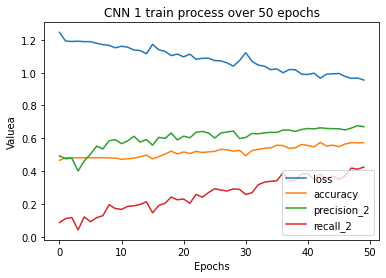

In [28]:
train_results.plot()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('CNN 1 train process over 50 epochs')

In [ ]:
model_perf = model.evaluate(test_gen)
model_perf

596/596 [==============================] - 60s 100ms/step - loss: 0.8125 - accuracy: 0.6520 - precision_1: 0.7275 - recall_1: 0.5585


[0.8125213384628296,
 0.6520415544509888,
 0.7274591326713562,
 0.5585178732872009]

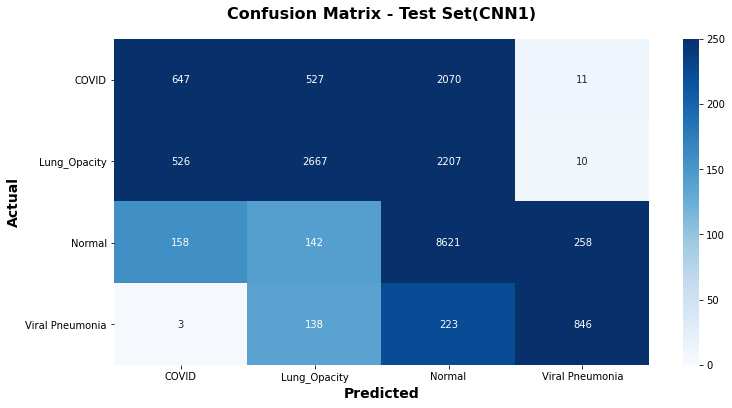

In [ ]:
y_pred = model.predict(test_gen)

predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))
y_true=test_gen.classes
CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)
len(y_true)
plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set(CNN1)',fontsize = 16,weight = 'bold',pad=20);

keras.backend.clear_session()

## Model 2(CNN2)

In [5]:
model2 = models.Sequential()
model2.add(keras.layers.ZeroPadding2D(padding=(2, 2), input_shape = (299,299,1)))
model2.add(layers.Conv2D(16,(7,7), activation = 'relu', padding = "valid"))
model2.add(layers.SpatialDropout2D(0.2))
model2.add(layers.MaxPooling2D((4,4), strides=(2, 2), padding='valid'))
#######################################################
model2.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model2.add(layers.Conv2D(16,(7,7), activation = 'relu', padding = "valid"))
model2.add(layers.SpatialDropout2D(0.2))
model2.add(layers.MaxPooling2D((4,4), strides=(2, 2), padding='valid'))
#######################################################
model2.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model2.add(layers.Conv2D(32,(5,5), activation = 'relu'))
model2.add(layers.SpatialDropout2D(0.2))
model2.add(layers.MaxPooling2D((2,2),strides=(2, 2), padding='valid'))
#######################################################
model2.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model2.add(layers.Conv2D(32,(5,5), activation = 'relu'))
model2.add(layers.SpatialDropout2D(0.2))
model2.add(layers.MaxPooling2D((2,2),strides=(2, 2), padding='valid'))
#######################################################
model2.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model2.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model2.add(layers.SpatialDropout2D(0.2))
model2.add(layers.MaxPooling2D((2,2),strides=(2, 2), padding='valid'))
#######################################################
model2.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model2.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model2.add(layers.SpatialDropout2D(0.2))
model2.add(layers.MaxPooling2D((2,2),strides=(2, 2), padding='valid'))
#######################################################
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(layers.Dense(128, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(layers.Dense(4, activation = 'softmax'))

In [15]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=sgd,
               loss='categorical_crossentropy', 
               metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])

In [16]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 303, 303, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 297, 297, 16)      800       
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 297, 297, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 147, 147, 16)      0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 151, 151, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 16)      12560     
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 145, 145, 16)      0

In [17]:
history2 = model2.fit(train_gen,epochs=50, batch_size=32, verbose=2)

Epoch 1/50
67/67 - 718s - loss: 1.2225 - accuracy: 0.4672 - precision_1: 0.4984 - recall_1: 0.1439
Epoch 2/50
67/67 - 20s - loss: 1.1928 - accuracy: 0.4766 - precision_1: 0.4934 - recall_1: 0.1067
Epoch 3/50
67/67 - 21s - loss: 1.1896 - accuracy: 0.4814 - precision_1: 0.4960 - recall_1: 0.1161
Epoch 4/50
67/67 - 21s - loss: 1.1888 - accuracy: 0.4814 - precision_1: 0.5082 - recall_1: 0.1175
Epoch 5/50
67/67 - 20s - loss: 1.1826 - accuracy: 0.4809 - precision_1: 0.5461 - recall_1: 0.1845
Epoch 6/50
67/67 - 21s - loss: 1.1908 - accuracy: 0.4814 - precision_1: 0.5000 - recall_1: 0.1732
Epoch 7/50
67/67 - 21s - loss: 1.1835 - accuracy: 0.4814 - precision_1: 0.5526 - recall_1: 0.1265
Epoch 8/50
67/67 - 21s - loss: 1.1883 - accuracy: 0.4814 - precision_1: 0.5180 - recall_1: 0.1156
Epoch 9/50
67/67 - 21s - loss: 1.1770 - accuracy: 0.4809 - precision_1: 0.5402 - recall_1: 0.1586
Epoch 10/50
67/67 - 20s - loss: 1.1606 - accuracy: 0.4908 - precision_1: 0.5897 - recall_1: 0.1845
Epoch 11/50
67/67 

In [18]:
train_results_2 = pd.DataFrame(history2.history)
train_results_2.iloc[49]

loss           0.947795
accuracy       0.610193
precision_1    0.682859
recall_1       0.464370
Name: 49, dtype: float64

In [19]:
train_results_2.describe()

,loss,accuracy,precision_1,recall_1
count,50.000000,50.000000,50.000000,50.000000
mean,1.037990,0.557622,0.644800,0.350580
std,0.082229,0.041314,0.063878,0.111348
min,0.947795,0.467202,0.493450,0.106654
25%,0.982723,0.559934,0.656704,0.355592
50%,1.003792,0.575035,0.674316,0.398301
75%,1.047954,0.583294,0.682229,0.421543
max,1.222518,0.610193,0.702977,0.464370


Text(0.5, 1.0, 'CNN 2 train process over 50 epochs')

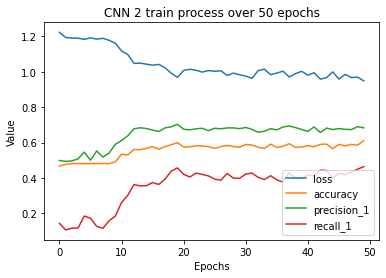

In [20]:
train_results_2.plot()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('CNN 2 train process over 50 epochs')

In [ ]:
model_perf2 = model2.evaluate(test_gen)
model_perf2

596/596 [==============================] - 60s 100ms/step - loss: 0.7405 - accuracy: 0.7100 - precision: 0.7768 - recall: 0.6168


[0.7405380010604858,
 0.7100346088409424,
 0.7768010497093201,
 0.6168258786201477]

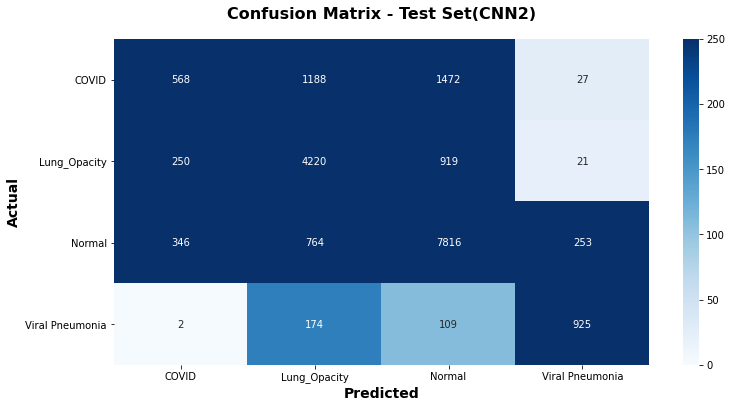

In [ ]:
y_pred2 = model2.predict(test_gen)

predictions2 = np.array(list(map(lambda x: np.argmax(x), y_pred2)))
y_true=test_gen.classes
CMatrix2 = pd.DataFrame(confusion_matrix(y_true, predictions2), columns=classes, index =classes)
len(y_true)
plt.figure(figsize=(12, 6))
ax2 = sns.heatmap(CMatrix2, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax2.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax2.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax2.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax2.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax2.set_title('Confusion Matrix - Test Set(CNN2)',fontsize = 16,weight = 'bold',pad=20);

keras.backend.clear_session()

## MODEL 3(CNN3)

In [21]:
model3 = models.Sequential()
model3.add(keras.layers.ZeroPadding2D(padding=(2, 2), input_shape = (299,299,1)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.SpatialDropout2D(0.1))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.SpatialDropout2D(0.1))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.SpatialDropout2D(0.1))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dropout(0.1))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dropout(0.1))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dropout(0.1))
model3.add(layers.Dense(4, activation='softmax'))


In [22]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(optimizer=sgd,
               loss='categorical_crossentropy', 
               metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])

In [23]:
history3 = model3.fit(train_gen,epochs=50, batch_size=32, verbose=2)

Epoch 1/50
67/67 - 23s - loss: 1.2173 - accuracy: 0.4743 - precision_2: 0.5040 - recall_2: 0.1482
Epoch 2/50
67/67 - 21s - loss: 1.1512 - accuracy: 0.4818 - precision_2: 0.5571 - recall_2: 0.2256
Epoch 3/50
67/67 - 21s - loss: 1.0971 - accuracy: 0.4983 - precision_2: 0.6115 - recall_2: 0.2511
Epoch 4/50
67/67 - 21s - loss: 1.0658 - accuracy: 0.5139 - precision_2: 0.6315 - recall_2: 0.2685
Epoch 5/50
67/67 - 22s - loss: 1.0205 - accuracy: 0.5304 - precision_2: 0.6454 - recall_2: 0.3049
Epoch 6/50
67/67 - 21s - loss: 1.0090 - accuracy: 0.5573 - precision_2: 0.6824 - recall_2: 0.3407
Epoch 7/50
67/67 - 21s - loss: 0.9956 - accuracy: 0.5531 - precision_2: 0.6630 - recall_2: 0.3657
Epoch 8/50
67/67 - 21s - loss: 0.9815 - accuracy: 0.5734 - precision_2: 0.6725 - recall_2: 0.3818
Epoch 9/50
67/67 - 21s - loss: 0.9782 - accuracy: 0.5663 - precision_2: 0.6774 - recall_2: 0.3955
Epoch 10/50
67/67 - 21s - loss: 0.9689 - accuracy: 0.5833 - precision_2: 0.6864 - recall_2: 0.4049
Epoch 11/50
67/67 -

In [24]:
train_results_3 = pd.DataFrame(history3.history)
train_results_3.iloc[49]

loss           0.822424
accuracy       0.645588
precision_2    0.708845
recall_2       0.544596
Name: 49, dtype: float64

In [25]:
train_results_3.describe()

,loss,accuracy,precision_2,recall_2
count,50.000000,50.000000,50.000000,50.000000
mean,0.905182,0.606786,0.689060,0.457480
std,0.095098,0.049131,0.042381,0.096771
min,0.764752,0.474280,0.504013,0.148183
25%,0.827716,0.578693,0.681264,0.410689
50%,0.893837,0.614677,0.690030,0.469089
75%,0.953160,0.645352,0.714017,0.538462
max,1.217265,0.677206,0.738351,0.583294


Text(0.5, 1.0, 'CNN 3 train process over 50 epochs')

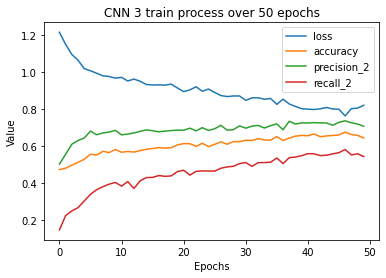

In [26]:
train_results_3.plot()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('CNN 3 train process over 50 epochs')

In [ ]:
model_perf3 = model3.evaluate(test_gen)
model_perf3

596/596 [==============================] - 60s 101ms/step - loss: 0.7494 - accuracy: 0.6708 - precision: 0.7252 - recall: 0.5925


[0.7493611574172974, 0.670830249786377, 0.7252055406570435, 0.5925264954566956]

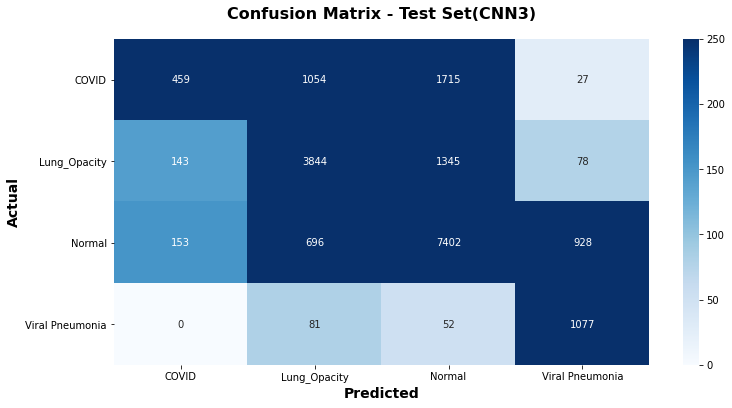

In [ ]:
y_pred3 = model3.predict(test_gen)

predictions3 = np.array(list(map(lambda x: np.argmax(x), y_pred3)))
y_true=test_gen.classes
CMatrix3 = pd.DataFrame(confusion_matrix(y_true, predictions3), columns=classes, index =classes)
len(y_true)
plt.figure(figsize=(12, 6))
ax2 = sns.heatmap(CMatrix3, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax2.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax2.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax2.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax2.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax2.set_title('Confusion Matrix - Test Set(CNN3)',fontsize = 16,weight = 'bold',pad=20);

keras.backend.clear_session()